La unidad de marketing de una empresa se ha puesto en contacto con usted a fin de que le ayude a comprender de mejor manera las interacciones que está teniendo en sus diferentes posteos dentro de la red social Facebook, puesto que últimamente parecen no cumplir con sus expectativas. Para esto conviene conocer que una interacción se entiende como cualquier acción realizada a nivel de una publicación, es decir, comentar, dar “like” o compartir.

Visto esto, usted propone crear un modelo que prediga cuántas interacciones tendrá un posteo determinado sobre la base de las características propias de dicho posteo.

Es así que la empresa comparte con usted la tabla facebook_posts.csv, que contiene datos respecto a los posteos realizados el año pasado. En este archivo se muestran las siguientes columnas:


* tipo: Categoría del contenido que muestra el posteo
* categoria: Etapa del funnel a la que pretende apuntar el posteo
* mes: Mes en el que se hizo el posteo
* dia_semana: Día de la semana (Lun–Dom) en que se hizo el posteo
* hora: Hora del día en que se hizo el posteo
* pautado: Si el posteo involucró un gasto promocional o fue orgánico
* alcance: Público objetivo al que se pretendió llegar con el posteo
* impresiones: Número de impresiones realizadas del posteo
* usuarios: Número de usuarios a quienes les apareció el posteo
* clicks: Número de clicks que se hicieron en el posteo
* interacciones: Número de comentarios, likes y clicks en compartir que se hicieron en el posteo

In [51]:
# Importamos las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler



## Diagnostico Inicial

In [53]:
# Leemos el archivo
df = pd.read_csv('../source/facebook.csv', sep=';')
df

,tipo,categoria,mes,dia_semana,hora,pautado,alcance,impresiones,usuarios,clicks,interacciones
0,Foto,Producto,12,4,3,No,2752,5091,109,159,100
1,Estado,Producto,12,3,10,No,10460,19057,1361,1674,164
2,Foto,Inspiracion,12,3,3,No,2413,4373,113,154,80
3,Foto,Producto,12,2,10,Si,50128,87991,790,1119,1777
4,Foto,Producto,12,2,3,No,7244,13594,410,580,393
...,...,...,...,...,...,...,...,...,...,...,...
495,Foto,Inspiracion,1,7,2,No,4684,7536,708,985,84
496,Foto,Producto,1,5,8,No,3480,6229,508,687,75
497,Foto,Accion,1,5,2,No,3778,7216,572,795,115
498,Foto,Inspiracion,1,4,11,No,4156,7564,574,832,136


* Analizaremos la variabilidad en atributos no numericos
* Estudiar datos atipicos en conjunto de datos numericos


In [54]:
print(df['tipo'].value_counts())

tipo
Foto      426
Estado     45
Link       22
Video       7
Name: count, dtype: int64


In [55]:
# funcion que evalue la concentracion en atributos no numericos
def var_numerico (serie):

    # Ordenar la serie de mayor a menor
    serie = serie.sort_values(ascending = False)

    # Definir los ratios relevantes
    ratio_freq_minimo = serie.iloc[0] / serie.iloc[1]
    ratio_freq_max = serie.iloc[0] / serie.iloc[-1]
    ratio_unicos = len(serie)/ serie.sum()

    # Mensajes que muestren los resultados alcanzados

    print(f'El caso de mayor frequencia es entre {ratio_freq_minimo:.1f} y {ratio_freq_max:.1f} veces el resto')
    print(f'Los casos unicos representan {ratio_unicos:.1%} del total de casos')

    # Evaluar que decidir con respecto a esta concentracion

    if ratio_freq_minimo > 9 and ratio_unicos < 0.1:
        print('Eliminar columna')
    elif ratio_freq_max > 9:
        print('Agrupar coolumna')
    else:
        print('Mantener columna')

    return (ratio_freq_minimo, ratio_freq_max, ratio_unicos)

### Columna Tipo

In [56]:
casos = df['tipo'].value_counts()

var_numerico(casos)

El caso de mayor frequencia es entre 9.5 y 60.9 veces el resto
Los casos unicos representan 0.8% del total de casos
Eliminar columna


(np.float64(9.466666666666667),
 np.float64(60.857142857142854),
 np.float64(0.008))

### Columna Categoria

In [57]:
casos = df['categoria'].value_counts()
var_numerico(casos)

El caso de mayor frequencia es entre 1.4 y 1.7 veces el resto
Los casos unicos representan 0.6% del total de casos
Mantener columna


(np.float64(1.3870967741935485),
 np.float64(1.6538461538461537),
 np.float64(0.006))

### Columna Pautado


In [58]:
casos = df['pautado'].value_counts()
var_numerico(casos)

El caso de mayor frequencia es entre 2.6 y 2.6 veces el resto
Los casos unicos representan 0.4% del total de casos
Mantener columna


(np.float64(2.597122302158273),
 np.float64(2.597122302158273),
 np.float64(0.004))

### Columna mes

In [59]:
casos = df['mes'].value_counts()
var_numerico(casos)

El caso de mayor frequencia es entre 1.2 y 2.4 veces el resto
Los casos unicos representan 2.4% del total de casos
Mantener columna


(np.float64(1.1538461538461537), np.float64(2.4), np.float64(0.024))

### Columna dia de semana

In [60]:
casos = df['dia_semana'].value_counts()
var_numerico(casos)

El caso de mayor frequencia es entre 1.0 y 1.3 veces el resto
Los casos unicos representan 1.4% del total de casos
Mantener columna


(np.float64(1.0123456790123457), np.float64(1.28125), np.float64(0.014))

### Columna hora

In [61]:
casos = df['hora'].value_counts()
var_numerico(casos)

El caso de mayor frequencia es entre 1.3 y 105.0 veces el resto
Los casos unicos representan 4.4% del total de casos
Agrupar coolumna


(np.float64(1.3461538461538463), np.float64(105.0), np.float64(0.044))

<function matplotlib.pyplot.show(close=None, block=None)>

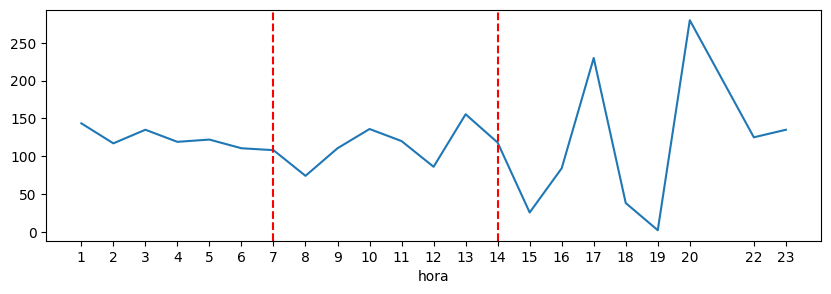

In [62]:
hora_int = df.groupby('hora')['interacciones'].median()
hora_int.plot(
    figsize=[10,3],
    xticks= casos.index
)
plt.axvline(x=7,color='red',linestyle = '--')
plt.axvline(x=14,color='red',linestyle = '--')
plt.show

## Outliers en atributos numericos

In [63]:
df

,tipo,categoria,mes,dia_semana,hora,pautado,alcance,impresiones,usuarios,clicks,interacciones
0,Foto,Producto,12,4,3,No,2752,5091,109,159,100
1,Estado,Producto,12,3,10,No,10460,19057,1361,1674,164
2,Foto,Inspiracion,12,3,3,No,2413,4373,113,154,80
3,Foto,Producto,12,2,10,Si,50128,87991,790,1119,1777
4,Foto,Producto,12,2,3,No,7244,13594,410,580,393
...,...,...,...,...,...,...,...,...,...,...,...
495,Foto,Inspiracion,1,7,2,No,4684,7536,708,985,84
496,Foto,Producto,1,5,8,No,3480,6229,508,687,75
497,Foto,Accion,1,5,2,No,3778,7216,572,795,115
498,Foto,Inspiracion,1,4,11,No,4156,7564,574,832,136


#### Haremos una reduccion dimensional y utilizaremos el PCA(Analisis de componentes principales)

In [64]:
# Extraemos las variables numericas
numerico = ['alcance', 'impresiones', 'usuarios', 'clicks', 'interacciones']
df_numerico = df[numerico]

In [65]:
# Aplicar reducciones dimensional de 5 a 2 dimensiones mediante PCA
pca = PCA(n_components = 2)
pca.fit(df_numerico)

df_pca = pd.DataFrame(pca.transform(df_numerico), columns=['PCA1', 'PCA2'])
print(df_pca.head(5))

           PCA1          PCA2
0 -26301.925434  -5790.091806
1 -11013.768604  -1130.881710
2 -27075.190199  -5970.457028
3  64716.189941  23107.051192
4 -17040.488618  -3170.283222


<function matplotlib.pyplot.show(close=None, block=None)>

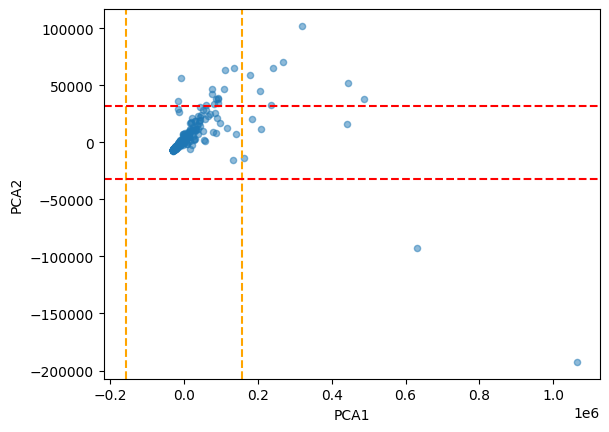

In [66]:
# Media y desviacion
medias = df_pca.mean()
desviaciones = df_pca.std()

# Definir limites

lim_hinf = medias['PCA1'] - 2*desviaciones['PCA1']
lim_hsup = medias['PCA1'] + 2*desviaciones['PCA1']

lim_vinf = medias['PCA2'] - 2*desviaciones['PCA2']
lim_vsup = medias['PCA2'] + 2*desviaciones['PCA2']

# visualizar datos transformados
df_pca.plot(
    x = 'PCA1',
    y = 'PCA2',
    kind = 'scatter',
    alpha = 0.5
)
# Limite 1
plt.axvline(x=lim_hinf, color= 'orange', linestyle='--')
plt.axvline(x=lim_hsup, color= 'orange', linestyle='--')

plt.axhline(y=lim_vinf, color = 'red', linestyle='--')
plt.axhline(y=lim_vsup, color = 'red', linestyle='--')
plt.show

In [67]:
# Identificar atipicos
def outlier (x):
    if (lim_hinf < x['PCA1'] < lim_hsup) and (lim_vinf < x['PCA2'] < lim_vsup):
        return 0
    else:
        return 1
df_pca['outlier'] = df_pca.apply(outlier, axis=1)
out = df_pca['outlier'].sum()
out

np.int64(27)

## Ingeneria de datos

In [68]:
# Eliminar la columna tipo
df = df.drop(columns='tipo')
df

,categoria,mes,dia_semana,hora,pautado,alcance,impresiones,usuarios,clicks,interacciones
0,Producto,12,4,3,No,2752,5091,109,159,100
1,Producto,12,3,10,No,10460,19057,1361,1674,164
2,Inspiracion,12,3,3,No,2413,4373,113,154,80
3,Producto,12,2,10,Si,50128,87991,790,1119,1777
4,Producto,12,2,3,No,7244,13594,410,580,393
...,...,...,...,...,...,...,...,...,...,...
495,Inspiracion,1,7,2,No,4684,7536,708,985,84
496,Producto,1,5,8,No,3480,6229,508,687,75
497,Accion,1,5,2,No,3778,7216,572,795,115
498,Inspiracion,1,4,11,No,4156,7564,574,832,136


In [69]:
# Agrupar las horas
def grupo_hora (x):
    if x < 7:
        return '00-07'
    elif x < 14:
        return '08-14'
    else:
        return '15-23'
df['hora'] = df['hora'].apply(grupo_hora)
df.sample(10)

,categoria,mes,dia_semana,hora,pautado,alcance,impresiones,usuarios,clicks,interacciones
367,Inspiracion,4,2,00-07,Si,5594,9586,670,1048,189
313,Inspiracion,6,7,00-07,Si,4022,6503,616,995,82
188,Inspiracion,9,7,00-07,Si,2351,4028,298,392,117
204,Inspiracion,8,2,00-07,No,3358,5682,323,523,132
337,Inspiracion,5,6,00-07,No,2812,4954,485,672,99
155,Producto,9,3,08-14,No,1685,2999,295,424,70
108,Inspiracion,10,7,08-14,No,2426,4469,237,325,148
396,Inspiracion,4,6,00-07,Si,3286,6276,458,633,115
90,Accion,11,2,00-07,No,24720,37240,564,850,421
94,Producto,11,7,00-07,No,2626,4943,213,299,148


**Excluir los outliers**

In [70]:
indices_sin = df_pca.loc[df_pca['outlier']== 0].index
indices_sin

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       489, 490, 491, 493, 494, 495, 496, 497, 498, 499],
      dtype='int64', length=473)

In [71]:
# filtramos los datasets con los indices
df = df.iloc[indices_sin].reset_index(drop=True)
df.shape

(473, 10)

In [77]:
#columnas a codificar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   categoria      473 non-null    object
 1   mes            473 non-null    int64 
 2   dia_semana     473 non-null    int64 
 3   hora           473 non-null    object
 4   pautado        473 non-null    object
 5   alcance        473 non-null    int64 
 6   impresiones    473 non-null    int64 
 7   usuarios       473 non-null    int64 
 8   clicks         473 non-null    int64 
 9   interacciones  473 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 37.1+ KB


In [78]:
# Codificamos mes y dia de semana ya que son etiquetas
df['mes'] = df['mes'].astype('str')
df['dia_semana'] = df['dia_semana'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   categoria      473 non-null    object
 1   mes            473 non-null    object
 2   dia_semana     473 non-null    object
 3   hora           473 non-null    object
 4   pautado        473 non-null    object
 5   alcance        473 non-null    int64 
 6   impresiones    473 non-null    int64 
 7   usuarios       473 non-null    int64 
 8   clicks         473 non-null    int64 
 9   interacciones  473 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 37.1+ KB


**codificacione One Hot Encoding**

In [79]:

X = df.drop(columns='interacciones')
y = df['interacciones']

In [ ]:
# Codificacion
X = pd.get_dummies(X, dtype=int, drop_first=True)
X.sample(10)

,alcance,impresiones,usuarios,clicks,categoria_Inspiracion,categoria_Producto,mes_10,mes_11,mes_12,mes_2,...,mes_9,dia_semana_2,dia_semana_3,dia_semana_4,dia_semana_5,dia_semana_6,dia_semana_7,hora_08-14,hora_15-23,pautado_Si
366,6172,10417,684,906,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
64,2352,5234,182,258,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
433,8500,14157,1029,1422,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
201,50640,121234,1577,2779,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32,5280,9578,237,345,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
310,56672,104966,1334,1850,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
295,22464,29650,934,1408,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
443,15288,31467,1401,2110,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
176,9124,17776,1397,1797,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
284,11620,21564,1138,2042,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


**Escalamos las variables numericas(Normalizacion MaxMin)**

In [86]:
# Definimos las variables a normalizar
var_num = ['alcance', 'impresiones', 'usuarios', 'clicks']
normalizar = MinMaxScaler()
normalizar.fit(X[var_num])
# transformar las variables
X[var_num] = normalizar.transform(X[var_num])

## Aplicando KVecinos

In [88]:
mod1 = KNeighborsRegressor(n_neighbors=2, p=2)
mod1.fit(X,y)

,n_neighbors,2
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [91]:
pred_y = mod1.predict(X)

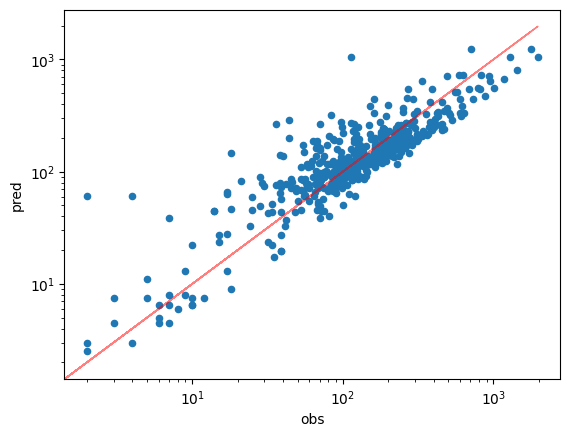

In [ ]:
# Compararos visualmente mediante un grafico
resultados = pd.DataFrame(dict(
    obs = y,
    pred = pred_y
))

resultados.plot(
    x = "obs",
    y='pred',
    kind='scatter'
)
plt.plot(resultados.obs, resultados.obs, color='red', alpha=0.5, linewidth =1)
plt.yscale('log') # Mejoramos la visualizacion a una escala logaritmica
plt.xscale('log')
plt.show()

In [100]:
# Metricas
mae = metrics.mean_absolute_error(y, pred_y)
rmse = np.sqrt(metrics.mean_squared_error(y, pred_y))
r2 = metrics.r2_score(y,pred_y)

print(f'MAE:{mae:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R2: {r2*100:.1f}%')

MAE:62.63
RMSE: 116.70
R2: 70.1%
